# Wage Profile 
Code to accompany Lecture on  
Regression  
Jiaming Mao (<jmao@xmu.edu.cn>)  
<https://jiamingmao.github.io>

In [81]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrix
%matplotlib inline

data = pd.read_csv("Wage.csv")
data.head()
age = data.age
wage = data.wage
age_grid = np.arange(age.min(),age.max())

## Piecewise Constant Regression

In [77]:
df_cut, bins = pd.cut(age, 4, retbins=True, right=True)
df_cut.value_counts(sort=False)

(17.938, 33.5]     750
(33.5, 49.0]      1399
(49.0, 64.5]       779
(64.5, 80.0]        72
Name: age, dtype: int64

In [78]:
df_steps = pd.concat([age, df_cut, wage], keys=['age','age_cuts','wage'], axis=1)
df_steps_dummies = pd.get_dummies(df_cut)
df_steps_dummies.head()

   (17.938, 33.5]  (33.5, 49.0]  (49.0, 64.5]  (64.5, 80.0]
0               1             0             0             0
1               1             0             0             0
2               0             1             0             0
3               0             1             0             0
4               0             0             1             0

In [79]:
fit = sm.GLM(df_steps.wage, df_steps_dummies).fit()
bin_mapping = np.digitize(age_grid, bins) 
age_pc = pd.get_dummies(bin_mapping) 
pred = fit.predict(age_pc)

Text(0, 0.5, 'wage')

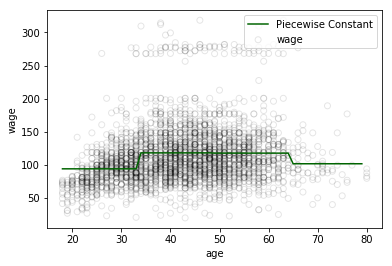

In [80]:
plt.scatter(age, wage, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(age_grid, pred, color='darkgreen', label='Piecewise Constant')
plt.legend()
plt.xlabel('age')
plt.ylabel('wage')

## Cubic Spline and Natural Cubic Spline

In [72]:
age_cs = dmatrix("bs(age, knots=(25,40,60), degree=3, include_intercept=False)",{"age": age},return_type='dataframe')
fit1 = sm.GLM(wage, age_cs).fit()
fit1.params

Intercept                                                            60.493714
bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[0]     3.980500
bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[1]    44.630980
bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[2]    62.838788
bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[3]    55.990830
bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[4]    50.688098
bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[5]    16.606142
dtype: float64

In [73]:
age_ncs = dmatrix("cr(age, knots=(25,40,60))", {"age": age}, return_type='dataframe')
fit2 = sm.GLM(wage, age_ncs).fit()
fit2.params

Intercept                         78.153929
cr(age, knots=(25, 40, 60))[0]   -23.394386
cr(age, knots=(25, 40, 60))[1]     9.985675
cr(age, knots=(25, 40, 60))[2]    39.053020
cr(age, knots=(25, 40, 60))[3]    37.689735
cr(age, knots=(25, 40, 60))[4]    14.819884
dtype: float64

Text(0, 0.5, 'wage')

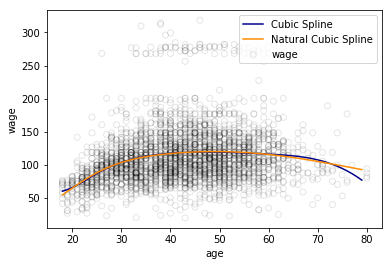

In [75]:
pred1 = fit1.predict(dmatrix("bs(age_grid, knots=(25,40,60), include_intercept=False)", {"age_grid": age_grid}, return_type='dataframe'))
pred2 = fit2.predict(dmatrix("cr(age_grid, knots=(25,40,60))", {"age_grid": age_grid}, return_type='dataframe'))

plt.scatter(age, wage, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(age_grid, pred1, color='darkblue', label='Cubic Spline')
plt.plot(age_grid, pred2, color='darkorange', label='Natural Cubic Spline')
plt.legend()
plt.xlabel('age')
plt.ylabel('wage')